<a href="https://colab.research.google.com/github/arturomf94/ce-mia/blob/master/tarea3/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install deap

In [0]:
import math
import random
from deap import creator, base, tools, algorithms
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# get length of binary representation given bounds and precision
def bin_len(lim_inf, lim_sup, pre):
  return int(math.log2((lim_sup - lim_inf) * 10 ** pre) + 0.9)

# return decimal given binary list and bounds
def decimalize(bin_list, lim_inf, lim_sup):
  bin_number = ''.join(str(e) for e in bin_list)
  bin_int = int(bin_number, 2)
  return lim_inf + (bin_int * (lim_sup - lim_inf) / (2 ** L - 1))

def decimal_representation(individual, D, L):
    decimal_representation = []
    for i in range(1, D + 1):
      lower_index = (i - 1) * L
      higher_index = i * L
      x = decimalize(individual[lower_index:higher_index], lim_inf, lim_sup)
      decimal_representation.append(x)
    return decimal_representation

In [0]:
### I

## parameters: 

lim_inf = -10
lim_sup = 10
pre = 3
L = bin_len(lim_inf, lim_sup, pre) # length of binary rep for one x_i
D = 10
N = D * L # length of total potential solution in binary representation

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1

## objective function

def obj(ind):
  result = 0
  for i in ind:
    result += i**2
  return result

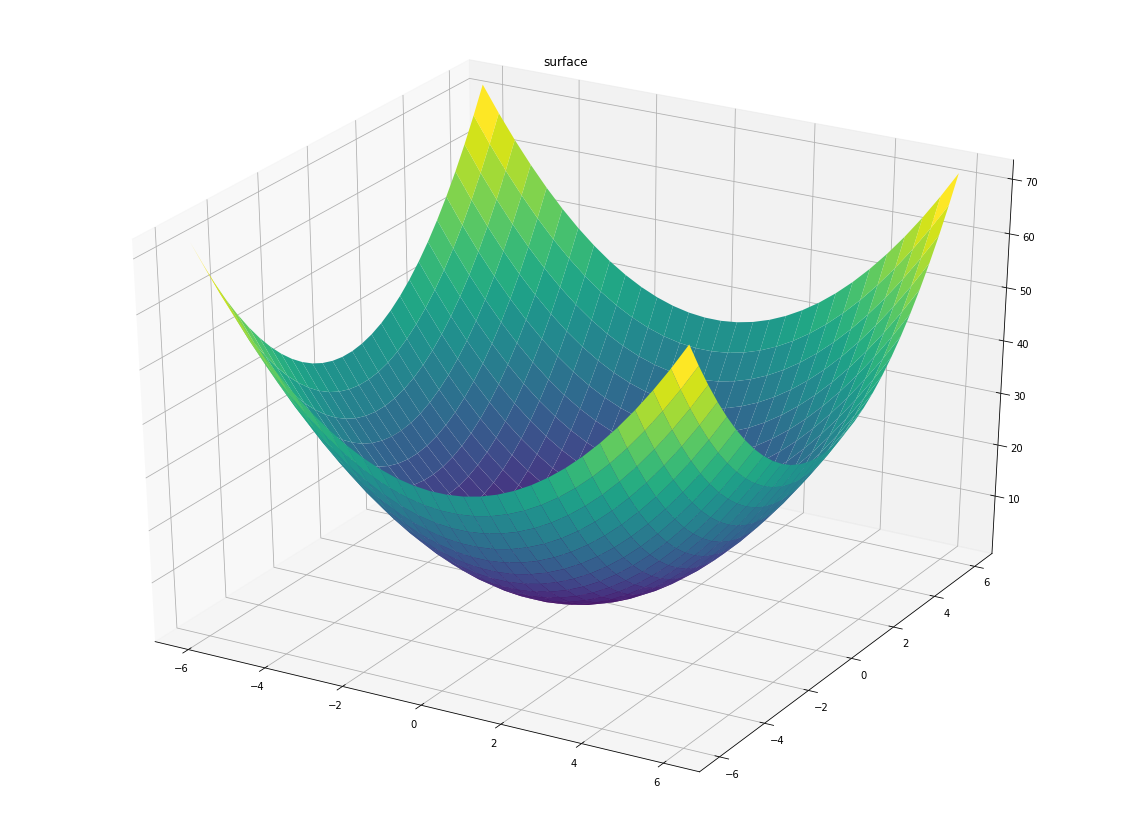

In [64]:
def f(x, y):
    return x ** 2 + y ** 2
  
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [0]:
# stochastic remainder selection (no replacement) for minimzation
from operator import attrgetter

def srnr(individuals):
  average_fit = sum(getattr(ind, 'fitness').values[0] for ind in individuals) / len(individuals)
  selected = []
  ascending_individuals = tools.selWorst(individuals, len(individuals))
  descending_individuals = tools.selBest(individuals, len(individuals))
  for i in range(len(individuals)):
    asc_ind = ascending_individuals[i]
    des_ind = descending_individuals[i]
    asc_ind.fitness.expected_value = des_ind.fitness.values[0] / average_fit
    asc_ind.fitness.expected_value_integer = math.floor(asc_ind.fitness.expected_value)
    asc_ind.fitness.expected_value_remainder = asc_ind.fitness.expected_value - asc_ind.fitness.expected_value_integer
    selected = selected + [asc_ind] * asc_ind.fitness.expected_value_integer
  i = 0
  while len(selected) < len(ascending_individuals):
    index = i % len(ascending_individuals)
    if random.random() < ascending_individuals[index].fitness.expected_value_remainder:
      selected.append(ascending_individuals[index])
    i += 1
  return selected

In [66]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n = N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    decimal_individual = decimal_representation(individual, D, L)
    return obj(decimal_individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.1)
toolbox.register("select", srnr)

population = toolbox.population(n = pop_size)

NGEN = num_gen
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb = p_xo, mutpb = p_mu)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring)    
    # apply elitism
    if gen > 0: 
      population = best_individual + population[:(len(population) - 1)]
    best_individual = tools.selBest(population, k=1)
    print('Gen ' + str(gen))
    print(best_individual[0])
    print(best_individual[0].fitness.values[0])
top10 = tools.selBest(population, k=10)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Gen 0
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
96.69243408242947
Gen 1
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
96.69243408242947
Gen 2
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1

In [0]:
### II

## parameters: 

lim_inf = -5.2
lim_sup = 5.2
D = 10
N = 10

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1
p_tournament_win = .7


## objective function

def obj(ind):
  result = 10 * D
  for i in ind:
    result += (i**2 - 10 * math.cos(2 * math.pi * i))
  return result

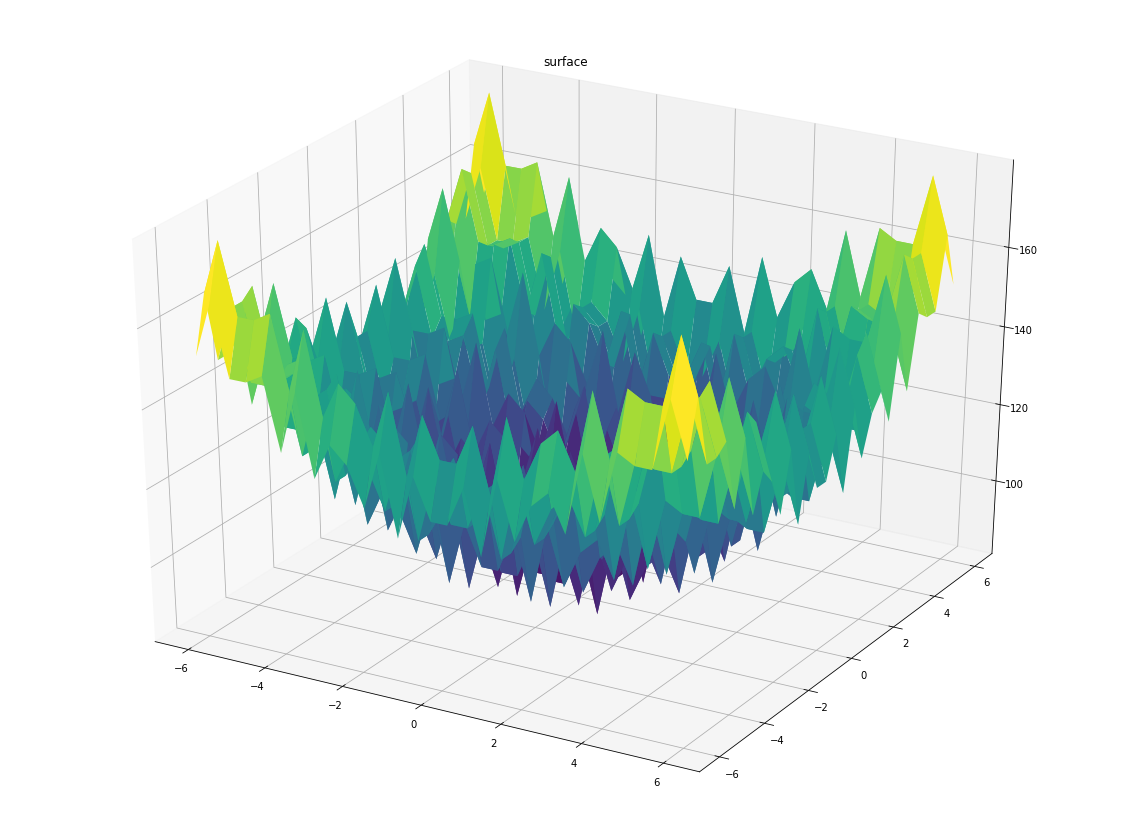

In [68]:
def f(x, y):
    return 10 * D + x ** 2 + y ** 2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)
  
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [0]:
from collections import Sequence
from itertools import repeat

def mutUniformFloat(individual, low, up, indpb):
    """Mutate an individual by replacing attributes, with probability *indpb*,
    by a integer uniformly drawn between *low* and *up* inclusively.
    :param individual: :term:`Sequence <sequence>` individual to be mutated.
    :param low: The lower bound or a :term:`python:sequence` of
                of lower bounds of the range from wich to draw the new
                integer.
    :param up: The upper bound or a :term:`python:sequence` of
               of upper bounds of the range from wich to draw the new
               integer.
    :param indpb: Independent probability for each attribute to be mutated.
    :returns: A tuple of one individual.
    """
    size = len(individual)
    if not isinstance(low, Sequence):
        low = repeat(low, size)
    elif len(low) < size:
        raise IndexError("low must be at least the size of individual: %d < %d" % (len(low), size))
    if not isinstance(up, Sequence):
        up = repeat(up, size)
    elif len(up) < size:
        raise IndexError("up must be at least the size of individual: %d < %d" % (len(up), size))

    for i, xl, xu in zip(range(size), low, up):
        if random.random() < indpb:
            individual[i] = random.uniform(xl, xu)

    return individual,
  
  
def selRandomTournament(individuals, k, tournsize, prob_win, fit_attr="fitness",):
    """Select the best individual among *tournsize* randomly chosen
    individuals, *k* times. The list returned contains
    references to the input *individuals*.
    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :param tournsize: The number of individuals participating in each tournament.
    :param fit_attr: The attribute of individuals to use as selection criterion
    :returns: A list of selected individuals.
    This function uses the :func:`~random.choice` function from the python base
    :mod:`random` module.
    """
    chosen = []
    for i in range(k):
        aspirants = tools.selRandom(individuals, tournsize)
        if random.random() < prob_win:
          chosen.append(max(aspirants, key=attrgetter(fit_attr)))
        else:
          chosen.append(random.choice(aspirants))
    return chosen


In [70]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", random.uniform, lim_inf, lim_sup)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n = N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return obj(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxSimulatedBinary, eta = 4)
toolbox.register("mutate", mutUniformFloat, low = lim_inf, up = lim_sup, indpb=0.1)
toolbox.register("select", selRandomTournament, tournsize=2, prob_win = p_tournament_win)

population = toolbox.population(n = pop_size)

NGEN = num_gen
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb = p_xo, mutpb = p_mu)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    # apply elitism
    if gen > 0: 
      population = best_individual + population[:(len(population) - 1)]
    best_individual = tools.selBest(population, k=1)
    print('Gen ' + str(gen))
    print(best_individual[0])
    print(best_individual[0].fitness.values[0])
top10 = tools.selBest(population, k=10)

Gen 0
[-0.4553864181812166, -3.270471820651335, 0.2572874896652788, -1.6590161881806962, 1.0343673213451883, -3.2305230884704867, -0.002801558386323677, 2.9154223709326432, 0.6818140182770156, -2.056341290357711]
120.34833046078904
Gen 1
[-0.6825799915631829, -3.2701085435856085, 1.1219611743751612, -0.7787262017867393, 0.9459535510454672, -2.7619870273931477, 0.9437310840282849, 2.8893614206216025, 0.7786459728035721, -1.7214792413763211]
103.47757040405936
Gen 2
[0.06069180585133643, -3.271265562295357, 0.493850919563103, -1.6886863052019214, 1.0488152341827637, -3.212926879318876, -1.922192169040634, 2.9716930463101137, 1.0827112769704585, -1.8663316525863807]
102.33758615624892
Gen 3
[0.06069180585133643, -3.271265562295357, 0.493850919563103, -1.6886863052019214, 1.0488152341827637, -3.212926879318876, -1.922192169040634, 2.9716930463101137, 1.0827112769704585, -1.8663316525863807]
102.33758615624892
Gen 4
[0.06069180585133643, -3.271265562295357, 0.493850919563103, -1.68868630520

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
# run function for problem one

def run_problem_one(trials):
  results = []
  trial_fitness = []
  for trial in range(trials):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n = N)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def evalOneMax(individual):
        decimal_representation = []
        for i in range(1, D + 1):
          lower_index = (i - 1) * L
          higher_index = i * L
          x = decimalize(individual[lower_index:higher_index], lim_inf, lim_sup)
          decimal_representation.append(x)
        return obj(decimal_representation),
    
    toolbox.register("evaluate", evalOneMax)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", srnr)
    
    population = toolbox.population(n=300)
    
    NGEN=500
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring)    
        # apply elitism
        if gen > 0: 
          population = best_individual + population[:(len(population) - 1)]
        best_individual = tools.selBest(population, k=1)
    top1 = tools.selBest(population, k=1)
    results = results + [decimal_representation(top1[0], D, L) + [top1[0].fitness.values[0]]]
    trial_fitness = trial_fitness + [top1[0].fitness.values[0]]
  return results, trial_fitness

In [72]:
### Table I

## parameters: 

trials = 10

lim_inf = -10
lim_sup = 10
pre = 3
L = bin_len(lim_inf, lim_sup, pre) # length of binary rep for one x_i
D = 10
N = D * L # length of total potential solution in binary representation

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1

## objective function

def obj(ind):
  result = 0
  for i in ind:
    result += i**2
  return result

results_1_1, fitness_1_1 = run_problem_one(trials)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [73]:
results_1_1

[[-0.005798516800439302,
  -0.15655995361186648,
  -0.03997924741355696,
  0.08026367992187211,
  0.049745170445875786,
  -0.12604144413586837,
  -0.055238502151555124,
  0.016174810022278052,
  0.1571703238013864,
  -0.012512588885158493,
  0.07911826019658014],
 [0.08636738181707138,
  -0.02166814172795739,
  0.09002960295419093,
  0.021057771538437464,
  0.028382213812676582,
  -0.008850367748038934,
  0.06134220404675439,
  -0.1638843958861056,
  0.03509628589739755,
  -0.030823694570756288,
  0.05016428187136752],
 [0.024109622486037097,
  0.037537766655477256,
  0.01983703115939761,
  -0.005798516800439302,
  0.02716147343363673,
  0.0027466658528396692,
  0.034485915707877624,
  -0.03509628589739755,
  -0.032654805139317844,
  0.10284737693411117,
  0.01722772514351415],
 [-0.039368877224037035,
  0.055238502151555124,
  -0.05401776177251527,
  0.04730368968779608,
  0.07415997802667285,
  0.019226660969877685,
  0.006408886989959228,
  -0.11261329996642999,
  -0.014343699453718

In [74]:
fitness_1_1

[0.07911826019658014,
 0.05016428187136752,
 0.01722772514351415,
 0.028603965938936875,
 0.02022006094613484,
 0.04575997486706188,
 0.018636715931052927,
 0.08836052446344052,
 0.061943623680041755,
 0.050884796991172224]

In [75]:
### Table II

## parameters: 

trials = 10

lim_inf = -10
lim_sup = 10
pre = 3
L = bin_len(lim_inf, lim_sup, pre) # length of binary rep for one x_i
D = 10
N = D * L # length of total potential solution in binary representation

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1

## objective function

def obj(ind):
  result = 10 * D
  for i in ind:
    result += (i**2 - 10 * math.cos(2 * math.pi * i))
  return result

results_1_2, fitness_1_2 = run_problem_one(trials)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [76]:
results_1_2

[[0.9445478682821129,
  1.999267555772576,
  -2.975249488814966,
  -2.031617175817133,
  0.9903256324961092,
  -0.02716147343363673,
  -0.0149540696432382,
  -0.98300119022187,
  1.025727103488265,
  1.0214545121616254,
  23.316533937235526],
 [0.00030518509475996325,
  -1.9962157048249765,
  2.032837916196174,
  0.021057771538437464,
  -0.01129184850611864,
  -1.0226752525406653,
  0.005798516800439302,
  -0.9762871181371509,
  -0.039368877224037035,
  -0.041199987792596815,
  11.303987549849747],
 [-0.9323404644917144,
  -0.003967406231879522,
  0.0021362956633197427,
  -0.00030518509475996325,
  -0.9244056520279553,
  0.991546372875149,
  0.9762871181371509,
  1.0287789544358645,
  0.975066377758111,
  -0.021057771538437464,
  8.168562506877961],
 [-0.022278511917477317,
  1.9876705221716975,
  1.024506363109225,
  0.9695730460524317,
  1.1185033722952973,
  -0.04669331949827615,
  -0.9366130558183539,
  1.0031434064760276,
  0.01312295907467842,
  0.9665211951048303,
  14.553008792

In [77]:
fitness_1_2

[23.316533937235526,
 11.303987549849747,
 8.168562506877961,
 14.553008792101595,
 17.946214297111027,
 25.794854930134818,
 7.7524847160518195,
 7.273828890225291,
 10.491957220400568,
 12.766059691090405]

In [0]:
# run function for problem one

def run_problem_two(trials):
  results = []
  trial_fitness = []
  for trial in range(trials):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    
    toolbox.register("attr_float", random.uniform, lim_inf, lim_sup)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n = N)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def evalOneMax(individual):
        return obj(individual),
    
    toolbox.register("evaluate", evalOneMax)
    toolbox.register("mate", tools.cxSimulatedBinary, eta = 4)
    toolbox.register("mutate", mutUniformFloat, low = lim_inf, up = lim_sup, indpb=0.1)
    toolbox.register("select", selRandomTournament, tournsize = 2, prob_win = p_tournament_win)
    
    population = toolbox.population(n = pop_size)
    
    NGEN = num_gen
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb = p_xo, mutpb = p_mu)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring, k=len(population))
        # apply elitism
        if gen > 0: 
          population = best_individual + population[:(len(population) - 1)]
        best_individual = tools.selBest(population, k=1)
    top1 = tools.selBest(population, k=1)
    results = results + [top1[0] + [top1[0].fitness.values[0]]]
    trial_fitness = trial_fitness + [top1[0].fitness.values[0]]
  return results, trial_fitness

In [79]:
### Table III

## parameters: 

trials = 10

lim_inf = -5.2
lim_sup = 5.2
D = 10
N = 10

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1
p_tournament_win = .7


## objective function

def obj(ind):
  result = 0
  for i in ind:
    result += i**2
  return result

results_2_1, fitness_2_1 = run_problem_two(trials)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [80]:
results_2_1

[[0.21353095566802976,
  -0.13052163118016788,
  -0.5716098279912015,
  1.4787803727108233,
  0.9115012016777077,
  -0.6861609813230463,
  0.3303693178046194,
  0.28691355671719254,
  -0.0007960213824151877,
  0.4445056793044483,
  4.266861092114186],
 [-0.11726948056448279,
  0.3395335621538773,
  0.7988258400222464,
  -1.4604744558878695,
  -0.11973196460493192,
  0.8698628779002151,
  -1.2690248905302655,
  -1.464869099740821,
  0.9568965630761597,
  -0.5996146106595208,
  8.702595065490152],
 [1.1238080721520523,
  -0.48297916088908216,
  0.1013980270925065,
  0.02313804418663952,
  -0.15567394859369957,
  0.060581748368132446,
  0.22074928480981504,
  1.6469551950462327,
  -0.19171886114979175,
  0.24232407486780133,
  4.391603648595291],
 [-0.17374341259161558,
  0.2896307568856639,
  0.11956006359644018,
  0.10309037589518663,
  -0.36382977392281396,
  1.3913427694657785,
  0.20511897674150747,
  -0.785137605377996,
  1.4539887200516963,
  -0.6268514572493974,
  5.37274259119140

In [81]:
fitness_2_1

[4.266861092114186,
 8.702595065490152,
 4.391603648595291,
 5.372742591191407,
 2.9644280845197635,
 1.4782357950236684,
 8.317359147998202,
 4.630022246858553,
 6.5460051116148374,
 8.502154954251063]

In [82]:
### Table 4

## parameters: 

trials = 10

lim_inf = -5.2
lim_sup = 5.2
D = 10
N = 10

pop_size = 50
num_gen = 50
p_xo = 0.5
p_mu = 0.1
p_tournament_win = .7


## objective function

def obj(ind):
  result = 10 * D
  for i in ind:
    result += (i**2 - 10 * math.cos(2 * math.pi * i))
  return result

results_2_2, fitness_2_2 = run_problem_two(trials)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [83]:
results_2_2

[[0.11649082599780818,
  -1.1477579582094086,
  -4.040840418437458,
  1.8404798675398557,
  3.015290628940967,
  1.0082046982563981,
  0.9707640969230101,
  1.9483790546350728,
  1.0189224411015219,
  -1.0359021522216505,
  50.59164924785584],
 [-1.955122550684734,
  -0.9258828785173682,
  -0.988331409835494,
  1.0411390412135748,
  -0.05544375772405452,
  -2.0363020357857535,
  0.09500900311152262,
  -1.993874754827642,
  -1.9999807244585606,
  -1.9031139302309605,
  28.70832477760962],
 [0.913229081246621,
  -0.0946826263691108,
  1.9462464621739213,
  0.018784259715728852,
  1.0939755888280775,
  0.987971440853015,
  1.9909693103964048,
  -1.9361158838348866,
  1.082562742638973,
  -0.9011713038407005,
  26.017972436314455],
 [-1.9032504279529159,
  -2.9063656122424844,
  -0.9649345300149222,
  -0.9215305044531013,
  -2.9991611684037065,
  0.9543776679543726,
  -2.1255097460655614,
  0.9099637534982701,
  0.9986903758551677,
  1.9871988850632336,
  43.90351595825335],
 [0.0606336912

In [84]:
fitness_2_2

[50.59164924785584,
 28.70832477760962,
 26.017972436314455,
 43.90351595825335,
 34.14107217591753,
 35.20019303838091,
 27.65892836901641,
 31.308471028095756,
 34.15833931181096,
 33.827430777652744]